**READING** ***AND VISUALIZATION OF DATA (USING GDAL LIB):***

In [ ]:
# !pip install segmentation-models

In [ ]:
# !pip install -U -q segmentation-models
# !pip install -q tensorflow==2.2.1
# !pip install -q keras==2.5
# import os
# os.environ["SM_FRAMEWORK"] = "tf.keras"

# from tensorflow import keras
# import segmentation_models as sm

In [ ]:
import os
import cv2
import numpy as np
import glob
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras;    from tensorflow.keras import layers;
from tensorflow.keras import metrics
import random

**UPLOAD THE DATA FROM DRIVE TO COLLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**SIMPLY VISUALIZING THE DATA**

(6, 256, 256)


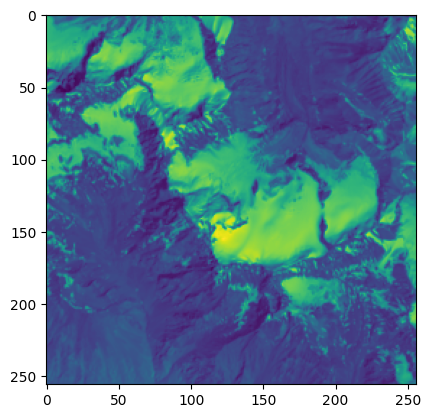

In [ ]:
#reading the dataset train_image & train_mask
# temp_img = cv2.imread('/content/gdrive/MyDrive/UNET_FINAL/train_image/1.tif',cv2.IMREAD_UNCHANGED) #6 channels / spectral bands
temp_img = gdal.Open('/content/gdrive/MyDrive/unet_split/train/images/115.tif').ReadAsArray() #6 channels / spectral bands

print(temp_img.shape)
plt.imshow(temp_img[3,:,:]) #View each channel

(256, 256)


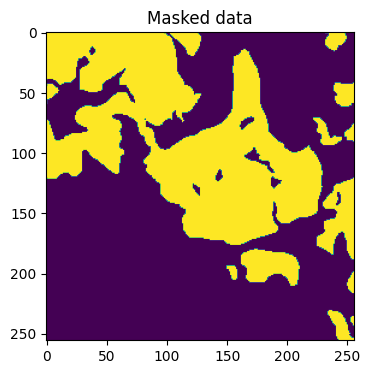

In [ ]:
temp_img = gdal.Open('/content/gdrive/MyDrive/unet_split/train/mask/115.tif').ReadAsArray() #channels / spectral bands

print(temp_img.shape)
plt.figure(figsize=(6, 4))
plt.title('Masked data')
plt.imshow(temp_img[:,:]) #View each channel
# plt.hist(np.ravel(temp_img),bins=10)

## **PLOTTING THE DATA**

In [ ]:
train_img_dir = '/content/gdrive/MyDrive/unet_split/train/images/'
train_mask_dir = '/content/gdrive/MyDrive/unet_split/train/mask/'
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

img_list = os.listdir(train_img_dir)
img_list.sort()  #Very important to sort as we want to match images and masks with same number.
msk_list = os.listdir(train_mask_dir)
msk_list.sort()
num_images = len(os.listdir(train_img_dir))
num_masks = len(os.listdir(train_mask_dir))
print("Total number of training images are: ", num_images)
print("Total number of training images are: ", num_masks)



Total number of training images are:  147
Total number of training images are:  147


In [ ]:
#split the data into training, validation and testing.


# Code for splitting folder into train, test, and val.
# Once the new folders are created rename them and arrange in the format below to be used
# for semantic segmentation using data generators.


# input_folder = '/content/gdrive/MyDrive/UNET_FINAL/train_image/'
# output_folder = '/content/gdrive/MyDrive/UNET_FINAL/mask/'
# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

In [ ]:

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import MeanIoU
import random



In [ ]:
train_img_dir = '/content/gdrive/MyDrive/unet_split/train/images/'
train_mask_dir = '/content/gdrive/MyDrive/unet_split/train/mask/'
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))
num_masks = len(os.listdir(train_mask_dir))

print(num_images)
print(num_masks)


147
147


Train Images Shape: (147, 256, 256, 3)
Train Masks Shape: (147, 256, 256)
(147, 256, 256, 3)
(147, 256, 256)


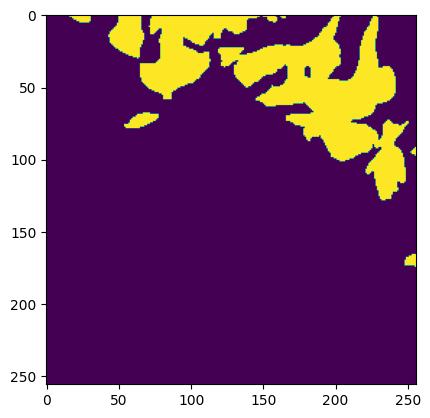

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from osgeo import gdal

train_img_dir = '/content/gdrive/MyDrive/unet_split/train/images/'
train_mask_dir = '/content/gdrive/MyDrive/unet_split/train/mask/'

train_img_files = glob.glob(train_img_dir + '*.tif')
train_mask_files = glob.glob(train_mask_dir + '*.tif')

train_images = []
train_masks = []

for img_file in train_img_files:
    base_name = os.path.basename(img_file)
    mask_file = os.path.join(train_mask_dir, base_name)
    if mask_file in train_mask_files:
        img_dataset = gdal.Open(img_file).ReadAsArray()
        mask_dataset = gdal.Open(mask_file).ReadAsArray()

        # Perform min-max normalization on training images
        img_dataset = (img_dataset - np.min(img_dataset)) / (np.max(img_dataset) - np.min(img_dataset))

        # Transpose the image array to (138, 138, 6) shape
        img_dataset = np.transpose(img_dataset, (1, 2, 0))
        img_dataset_G = img_dataset[:, :, 0]
        img_dataset_SWR = img_dataset[:, :, 3]
        img_dataset_TH = img_dataset[:, :, 5]
        img_dataset = np.dstack((img_dataset_G, img_dataset_SWR, img_dataset_TH))

        # img_dataset = img_dataset[:, :, 0:3]

        train_images.append(img_dataset)
        train_masks.append(mask_dataset)

train_images = np.array(train_images)
train_masks = np.array(train_masks)

# # Convert the arrays to tensors
# train_images = tf.convert_to_tensor(train_images)
# train_masks = tf.convert_to_tensor(train_masks)

# Print the shapes to verify
print('Train Images Shape:', train_images.shape)
print('Train Masks Shape:', train_masks.shape)

print(train_images.shape)
plt.imshow(train_images[3,:,:])


print(train_masks.shape)
plt.imshow(train_masks[33,:,:])






In [ ]:
x1=tf.stack(train_images) #convert numpy array to tensors
print(x1[0].shape)
y1 = tf.stack(train_masks)


print(x1.shape, y1.shape)



(256, 256, 3)
(147, 256, 256, 3) (147, 256, 256)


In [ ]:
num_images = len(os.listdir(train_img_dir))
num_masks = len(os.listdir(train_mask_dir))


print(num_images)
print(num_masks)


147
147


In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from osgeo import gdal

val_img_dir = '/content/gdrive/MyDrive/unet_split/val/images/'
val_mask_dir = '/content/gdrive/MyDrive/unet_split/val/mask/'

val_img_files = glob.glob(val_img_dir + '*.tif')
val_mask_files = glob.glob(val_mask_dir + '*.tif')

val_images = []
val_masks = []

for img_file in val_img_files:
    base_name = os.path.basename(img_file)
    mask_file = os.path.join(val_mask_dir, base_name)
    if mask_file in val_mask_files:
        img_dataset = gdal.Open(img_file).ReadAsArray()
        mask_dataset = gdal.Open(mask_file).ReadAsArray()

        # Perform min-max normalization on validation images
        img_dataset = (img_dataset - np.min(img_dataset)) / (np.max(img_dataset) - np.min(img_dataset))

        # Transpose the image array to (138, 138, 6) shape
        img_dataset = np.transpose(img_dataset, (1, 2, 0))
        img_dataset_G = img_dataset[:, :, 0]
        img_dataset_SWR = img_dataset[:, :, 3]
        img_dataset_TH = img_dataset[:, :, 5]
        img_dataset = np.dstack((img_dataset_G, img_dataset_SWR, img_dataset_TH))

        val_images.append(img_dataset)
        val_masks.append(mask_dataset)

val_images = np.array(val_images)
val_masks = np.array(val_masks)

# Convert the arrays to tensors
val_images = tf.convert_to_tensor(val_images)
val_masks = tf.convert_to_tensor(val_masks)

# Print the shapes to verify
print('Validation Images Shape:', val_images.shape)
print('Validation Masks Shape:', val_masks.shape)


Validation Images Shape: (49, 256, 256, 3)
Validation Masks Shape: (49, 256, 256)


In [ ]:
v1=tf.stack(val_images) #convert numpy array to tensors
print(x1[0].shape)
vm1 = tf.stack(val_masks)


print(x1.shape, y1.shape)

(256, 256, 3)
(147, 256, 256, 3) (147, 256, 256)


In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras import backend as K
from keras.callbacks import ModelCheckpoint, CSVLogger

In [ ]:
seed = 2
# batch_size = 16
# n_classes = 2
# import segmentation_models as sm
import tensorflow as tf

start_neurons = 16
kernel_size = 7
kernel_size_trans = 5
batchsize = 12
LR = 0.0001

# Define the U-Net model using a pre-trained encoder
# BACKBONE = 'resnet34'  # Change the backbone architecture if desired
# IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 256, 256, 3  # Update with your image dimensions
# n_classes = 2  # Number of classes (0 and 1 in your case)



In [ ]:
#Model architecture
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (kernel_size, kernel_size), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (kernel_size, kernel_size), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2),strides=(2, 2))(conv1)
#     pool1 = MaxPooling2D((2,2))(conv1)
#     pool1 = Dropout(0.12)(pool1)
#     pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_neurons * 2, (kernel_size, kernel_size), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (kernel_size, kernel_size), activation="relu", padding="same")(conv2)
#     pool2 = MaxPooling2D((2,2))(conv2)
    pool2 = MaxPooling2D((2, 2),strides=(2, 2))(conv2)
#     pool2 = Dropout(0.25)(pool2)
#     pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(conv3)
    conv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(conv3)
#     pool3 = MaxPooling2D((2,2))(conv3)
    pool3 = MaxPooling2D((2, 2),strides=(2, 2))(conv3)
#     pool3 = Dropout(0.25)(pool3)
#     pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(conv4)
    conv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(conv4)
#     pool4 = MaxPooling2D((2,2))(conv4)
    pool4 = MaxPooling2D((2, 2),strides=(2, 2))(conv4)
#     pool4 = Dropout(0.5)(pool4)
#     pool4 = Dropout(0.5)(pool4)

    conv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(pool4)
    conv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(conv5)
    conv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(conv5)
#     pool5 = MaxPooling2D((2,2))(conv5)
#     pool5 = MaxPooling2D((2, 2))(conv5)
    pool5 = MaxPooling2D((2, 2),strides=(2, 2))(conv5)

    # Middle
    convm = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(pool5)
    convm = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(convm)

#     deconv5 = Conv2DTranspose(start_neurons * 8, (kernel_size, kernel_size), strides=(2,2), padding="same", activation="relu")(convm)
    deconv5 = Conv2DTranspose(start_neurons * 8, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(convm)
# #     uconv4 = Dropout(0.25)(uconv4)
# #     uconv4 = Dropout(0.5)(uconv4)
# #     uconv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv5)
    uconv5 = concatenate([deconv5, conv5])
    uconv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv5)
    uconv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv5)
    uconv5 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv5)

#     deconv4 = Conv2DTranspose(start_neurons * 8, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(convm)
    deconv4 = Conv2DTranspose(start_neurons * 8, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(uconv5)
#     uconv4 = Dropout(0.25)(uconv4)
#     uconv4 = Dropout(0.5)(uconv4)
#     uconv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv4)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (kernel_size, kernel_size), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(uconv4)
#     uconv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(uconv3)
    uconv3 = concatenate([deconv3, conv3])
#     uconv3 = Dropout(0.25)(uconv3)
#     uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (kernel_size, kernel_size), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
#     uconv2 = Dropout(0.25)(uconv2)
#     uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (kernel_size, kernel_size), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (kernel_size, kernel_size), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (kernel_size_trans, kernel_size_trans), strides=(2, 2), padding="same", activation="relu")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
#     uconv1 = Dropout(0.25)(uconv1)
#     uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (kernel_size, kernel_size), activation="relu", padding="same")(uconv1)
#     uconv1 = Conv2D(start_neurons * 1, (kernel_size, kernel_size), activation="relu", padding="same")(uconv1)

    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
#     output_layer = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv1)

    return output_layer

In [ ]:
from keras.layers import Input, Dropout

In [ ]:
# inp_shape = np.array(inp_shape)
input_layer = Input(x1[0].shape)
output_layer = build_model(input_layer, start_neurons)

NameError: ignored

In [ ]:
IoU = tf.keras.metrics.IoU(num_classes=2,target_class_ids=[1])
AUC = tf.keras.metrics.AUC()
TP = tf.keras.metrics.TruePositives()
FN = tf.keras.metrics.FalseNegatives()
FP = tf.keras.metrics.FalsePositives()
TN = tf.keras.metrics.TrueNegatives()

In [ ]:
# # Define the model
# model = sm.Unet(BACKBONE, encoder_weights='imagenet',
#                 input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
#                 classes=n_classes, activation='softmax')

In [ ]:
#model
model = Model(inputs = input_layer, outputs = output_layer)
opt = tf.optimizers.Adam(learning_rate = LR,beta_1 = 0.9, beta_2 = 0.999)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=[IoU,AUC,TP,FN,FP,TN])


NameError: ignored

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  12560       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# history = model.fit(x1, y1)

In [ ]:
# Train the model
history = model.fit(x1, y1,  # Provide your training data
                    steps_per_epoch=len(x1),  # Adjust the number of steps per epoch
                    epochs=6,
                    verbose=1,
                    validation_data=(v1, vm1),  # Provide your validation data
                    validation_steps=len(val_images))  # Adjust the number of validation steps

# Save the trained model
model.save('/content/gdrive/MyDrive/unet_try_12.hdf5')

# Save the training history
np.save('/content/gdrive/MyDrive/history1.npy', history.history)

# Save the training history
import pickle

with open('/content/gdrive/MyDrive/history1.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/6
147/147 [==============================] - 486s 3s/step - loss: 0.4000 - io_u: 0.0000e+00 - auc: 0.4111 - true_positives: 2471.0000 - false_negatives: 776961.0000 - false_positives: 15834.0000 - true_negatives: 8838526.0000 - val_loss: 0.2434 - val_io_u: 0.0000e+00 - val_auc: 0.7443 - val_true_positives: 0.0000e+00 - val_false_negatives: 160563.0000 - val_false_positives: 0.0000e+00 - val_true_negatives: 3050701.0000
Epoch 2/6
147/147 [==============================] - 489s 3s/step - loss: 0.2741 - io_u: 0.0000e+00 - auc: 0.7209 - true_positives: 0.0000e+00 - false_negatives: 779432.0000 - false_positives: 0.0000e+00 - true_negatives: 8854360.0000 - val_loss: 0.1967 - val_io_u: 0.0000e+00 - val_auc: 0.7573 - val_true_positives: 0.0000e+00 - val_false_negatives: 160563.0000 - val_false_positives: 0.0000e+00 - val_true_negatives: 3050701.0000
Epoch 3/6
147/147 [==============================] - 478s 3s/step - loss: 0.2574 - io_u: 0.0000e+00 - auc: 0.7318 - true_positives: 0.000

In [ ]:

# Save the training history
np.save('/content/gdrive/MyDrive/history1.npy', history.history)

In [ ]:
# Save the training history
import pickle

with open('/content/gdrive/MyDrive/history1.pkl', 'wb') as file:
    pickle.dump(history.history, file)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Load the saved history
with open('/content/gdrive/MyDrive/history1.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot the loss
plt.plot(history['auc'])
plt.plot(history['val_auc'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.savefig('/content/gdrive/MyDrive/results_unet/accuracy_vs_epoch1.jpg', dpi =200)


EOFError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Load the saved history
with open('/content/gdrive/MyDrive/history1.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot the IOU
plt.plot(history['iou'])
plt.plot(history['val_iou'])
plt.title('Intersection over Union (IOU)')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.legend(['Train', 'Validation'])
plt.savefig('/content/gdrive/MyDrive/results_unet/iou_vs_epoch1.jpg', dpi=200)
plt.show()

# Plot the Dice coefficient
plt.plot(history['dice'])
plt.plot(history['val_dice'])
plt.title('Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend(['Train', 'Validation'])
plt.savefig('/content/gdrive/MyDrive/results_unet/dice_vs_epoch1.jpg', dpi=200)
plt.show()


KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Load the saved history
with open('/content/gdrive/MyDrive/history1.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot the loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
# plt.savefig('/content/gdrive/MyDrive/results_unet/loss_vs_epoch1.jpg', dpi =200)




EOFError: ignored

In [ ]:
import matplotlib.pyplot as plt

model = load_model('/content/gdrive/MyDrive/unet_try_1.hdf5')

# Perform prediction on the training data
predictions = model.predict(x1)

# Display the results
for i in range(len(x1)):
    # Display the original image and predicted mask side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axs[0].imshow(x1[i])
    axs[0].set_title('Original Image')

    # Plot the predicted mask
    axs[1].imshow(predictions[i])
    axs[1].set_title('Predicted Mask')

    # Add a legend
    axs[1].legend(['Class 0', 'Class 1'])  # Replace with appropriate legend labels

    # Save the figure
    plt.savefig('/content/gdrive/MyDrive/results/' + str(i) + '.jpg', dpi=1200)
    plt.close(fig)


5/5 [==============================] - 123s 24s/step


In [ ]:

model = load_model('/content/gdrive/MyDrive/unet_try_1.hdf5')

# # Perform prediction on the training data
predictions = model.predict(x1)

# Display the results
for i in range(len(x1)):
    # Display the original image
    fig = plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(x1[i])
    plt.title('Original Image')
    # plt.imsave(x1[i])
    # Display the predicted mask
    plt.subplot(1, 2, 2)
    # plt.imsave(predictions[i])
    plt.imshow(predictions[i])
    plt.title('Predicted Mask')
    plt.savefig('/content/gdrive/MyDrive/results_thermal/'+str(i)+'.jpg', dpi =1200)
    # plt.show()

In [ ]:

model = load_model('/content/gdrive/MyDrive/unet_try_1.hdf5')

# # Perform prediction on the training data
predictions = model.predict(x1)

# Display the results
for i in range(len(x1)):
    # Display the original image
    fig = plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(x1[i])
    plt.title('Original Image')
    # plt.imsave(x1[i])
    # Display the predicted mask
    plt.subplot(1, 2, 2)
    # plt.imsave(predictions[i])
    plt.imshow(predictions[i])
    plt.title('Predicted Mask')
    plt.savefig('/content/gdrive/MyDrive/results_thermal/'+str(i)+'.jpg', dpi =1200)
    # plt.show()


5/5 [==============================] - 143s 28s/step


FileNotFoundError: ignored

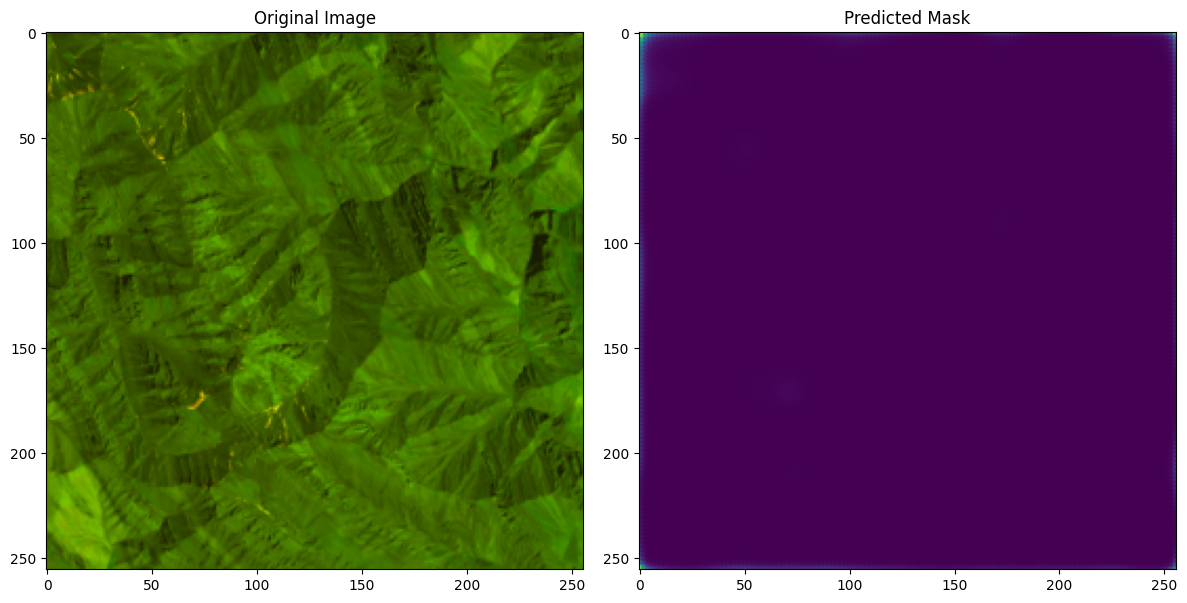

In [ ]:
import matplotlib.pyplot as plt

model = load_model('/content/gdrive/MyDrive/unet_try_1.hdf5')

# Perform prediction on the training data
predictions = model.predict(x1)

# Display the results horizontally
for i in range(len(x1)):
    # Create a figure with a horizontal layout
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original image
    axes[0].imshow(x1[i])
    axes[0].set_title('Original Image')

    # Display the predicted mask
    axes[1].imshow(predictions[i])
    axes[1].set_title('Predicted Mask')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Save the figure
    plt.savefig('/content/gdrive/MyDrive/results_thermal1/' + str(i) + '.jpg', dpi=1200)

    # Optionally, display the figure
    plt.show()


In [ ]:

# model = load_model('/content/gdrive/MyDrive/unet_try.hdf5')

# # Perform prediction on the training data
# # predictions = model.predict(x1)

# # Display the results
# for i in range(len(x1)):
#     # Display the original image
import cv2
from google.colab.patches import cv2_imshow
img1 = x1[0]
img2 = predictions[0]
im_h = cv2.hconcat([img1, img2])
# cv2.write('/content/gdrive/MyDrive/results_unet/'+str(i)+'.jpg', dpi =200)

In [ ]:
plt.imshow(x1[i])
print(i)

In [ ]:
#load model
model = load_model('/content/gdrive/MyDrive/unet_try.hdf5')
print(model.history)

In [ ]:
# model.summary()

In [ ]:
# Evaluate the model on the training data
train_loss = model.evaluate(x1, y1, verbose=0)

print("Training Loss:", train_loss)


In [ ]:
print(model.history)

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/unet.hdf5', compile=False)

In [ ]:
import tensorflow as tf
import numpy as np

# Load the UNet model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/unet.hdf5')

# Load the image
# image = gdal.Open('/content/gdrive/MyDrive/unet_split/val/images/119.tif').ReadAsArray()

# # Preprocess the image
# image = tf.image.resize(image, (256, 256))
# image = image / 255.0

# Make a prediction
prediction = model.predict(test_image)

# Visualize the prediction
plt.imshow(prediction[0][:,:,0])


In [ ]:
plt.hist(np.ravel(prediction[0]),bins=10)

In [ ]:
result = model.predict(test)

In [ ]:
# model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')
# model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])
# model.fit(x = train_images, y = train_masks)

In [ ]:
#plot the training and validation IoU and loss at each epoch
# loss = model.history['loss']
# val_loss = model.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

if 'loss' not in model.history:
  model.history['loss'] = []


# Get the loss values
loss = model.history['loss']

# Plot the loss values
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the UNet model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/unet_try.hdf5')

# Get the LOu values from the training and validation history
history = model.history
train_iou = history['iou_loss']
val_iou = history['val_iou_loss']

# Plot the LOu values
epochs = range(1, len(train_iou) + 1)
plt.plot(epochs, train_iou, 'y', label='Training LOu')
plt.plot(epochs, val_iou, 'r', label='Validation LOu')
plt.title('Training and validation LOu')
plt.xlabel('Epochs')
plt.ylabel('LOu')
plt.legend()
plt.show()


In [ ]:
from keras.models import load_model

model = load_model('/content/gdrive/MyDrive/unet.hdf5', compile=False)

#batch_size=32 #Check IoU for a batch of images

#Test generator using validation data.

test_image_batch, test_mask_batch = val_img_gen.__next__()

#Convert categorical to integer for visualization and IoU calculation
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())



In [ ]:
#View a few images, masks and corresponding predictions.
img_num = random.randint(0, test_image_batch.shape[0]-1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_image_batch[img_num])
plt.subplot(232)
